In [2]:
import numpy as np
import pandas as pd
from pyBibX.base import pbx_probe
from tabulate import tabulate
from prettytable import PrettyTable

c:\Users\bicic\Documents\Programming\bibliography\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load bib file
# Arguments for pbx_probe: file_bib = 'filename.bib'; db = 'scopus', 'wos', 'pubmed'; del_duplicated = True, False
# Note: the other arguments lead to an key error for some reason 
file_path = './bib-Files/scopus01.bib'
database = 'scopus'
bibfile = pbx_probe(file_bib = file_path)

A Total of 3794 Documents were Found ( 3863 Documents and 69 Duplicates )

Article = 2223
Book = 649
Book chapter = 419
Conference paper = 231
Conference review = 1
Editorial = 15
Note = 11
Retracted = 1
Review = 237
Short survey = 7


In [ ]:
# Generic report
report = bibfile.eda_bib()


Main Information    Results
0                                Timespan  1973-2025
1               Total Number of Countries          1
2            Total Number of Institutions          1
3                 Total Number of Sources       2554
4              Total Number of References          0
5               Total Number of Languages          1
6                    --unknow (# of docs)       3794
7                                    -//-       -//-
8               Total Number of Documents       3794
9                               --Article       2223
10                                 --Book        649
11                         --Book chapter        419
12                     --Conference paper        231
13                    --Conference review          1
14                            --Editorial         15
15                                 --Note         11
16                            --Retracted          1
17                               --Review        237
18                         --Short survey          7
19           Average Documents per Author        1.1
20      Average Documents per Institution    10243.0
21           Average Documents per Source       1.49
22             Average Documents per Year      72.96
23                                   -//-       -//-
24                Total Number of Authors       8060
25       Total Number of Authors Keywords       7482
26  Total Number of Authors Keywords Plus       5840
27        Total Single-Authored Documents       1342
28         Total Multi-Authored Documents       2452
29            Average Collaboration Index       2.33
30                            Max H-Index          9
31                                   -//-       -//-
32              Total Number of Citations     161772
33           Average Citations per Author      20.07
34      Average Citations per Institution   161772.0
35         Average Citations per Document      42.64
36           Average Citations per Source      63.34
37                                   -//-       -//-

In [ ]:
#bibfile.data is the dataframe with the content
print(tabulate(bibfile.data.head(n = 10), headers = 'keys', tablefmt = 'psql'))

+----+------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [18]:
# Check Docs IDs
print(tabulate(bibfile.table_id_doc, headers = 'keys', tablefmt = 'psql'))

+------+------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [19]:
#DocIDs per Type
print(tabulate(bibfile.id_doc_types(), headers = 'keys', tablefmt = 'psql'))

+----+-------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [20]:
# Check authors
print(tabulate(bibfile.table_id_aut, headers='keys', tablefmt='psql'))

+------+--------+------------------------------------------+
|      | ID     | Author                                   |
|------+--------+------------------------------------------|
|    0 | a_0    | (rami)shani, a.b.                        |
|    1 | a_1    | aakhus, mark                             |
|    2 | a_2    | abbas, mazhar                            |
|    3 | a_3    | abbas, sammar                            |
|    4 | a_4    | abbasi, kashif shafique                  |
|    5 | a_5    | abbott, ian                              |
|    6 | a_6    | abdelhakim, mohamed                      |
|    7 | a_7    | abdelmoteleb, samir a.                   |
|    8 | a_8    | abdelwahab, shimaa m.                    |
|    9 | a_9    | abdul-jabbar, mustafa                    |
|   10 | a_10   | abdul-samad, zulkiflee                   |
|   11 | a_11   | abdulla, aysha ebrahim                   |
|   12 | a_12   | abdulla, israa salah                     |
|   13 | a_13   | abdull

In [ ]:
# Check institutions
print(tabulate(bibfile.table_id_uni, headers='keys', tablefmt='psql'))

# Note: maybe there is an option to import institution on scopus

+----+------+---------------+
|    | ID   | Institution   |
|----+------+---------------|
|  0 | i_0  | UNKNOW        |
+----+------+---------------+


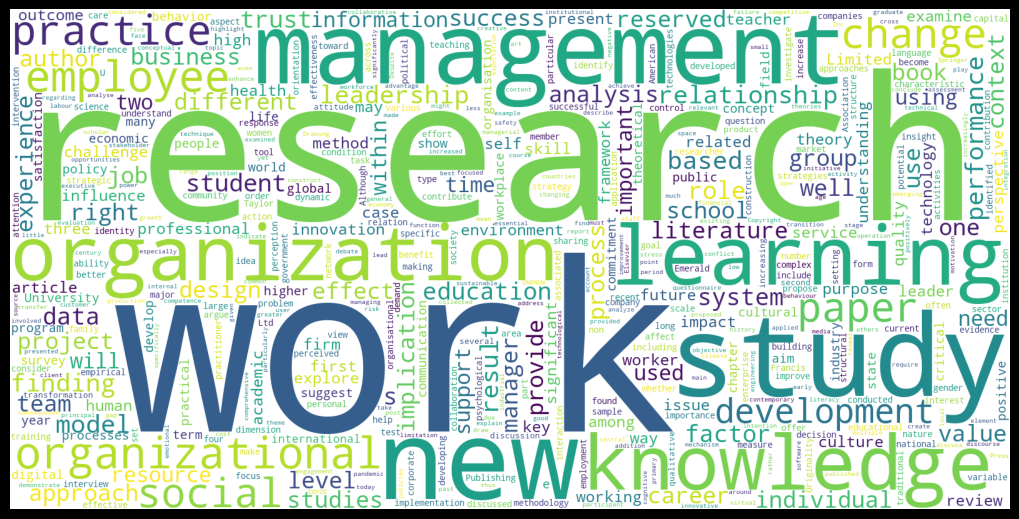

In [ ]:
# Wordcloud from abstracts
bibfile.word_cloud_plot(entry='abs')

In [29]:
# Sorting words in abstracts by importance
table             = PrettyTable()
data_wd           = bibfile.ask_gpt_wd
table.field_names = ['Word', 'Importance']
for key, value in data_wd.items():
    table.add_row([key, round(value, 4)])
print(table)

+----------------+------------+
|      Word      | Importance |
+----------------+------------+
|      work      |    1.0     |
|    research    |   0.6972   |
|     study      |   0.6707   |
|      new       |   0.6431   |
|   management   |   0.5043   |
|    learning    |   0.4658   |
|  organization  |   0.4655   |
|   knowledge    |   0.4647   |
| organizational |   0.4298   |
|    employee    |   0.4158   |
|    practice    |   0.3843   |
|     social     |   0.3754   |
|     paper      |   0.3723   |
|     change     |   0.3715   |
|  development   |   0.3666   |
|  relationship  |   0.3444   |
|  performance   |   0.3379   |
|     model      |   0.3296   |
|   leadership   |   0.326    |
|     based      |   0.3189   |
|    finding     |   0.3171   |
|     result     |   0.3111   |
|      role      |   0.2879   |
|     trust      |   0.2856   |
|    student     |   0.2838   |
|   education    |   0.2762   |
|     factor     |   0.2741   |
|     system     |   0.2736   |
|       

In [5]:
# N-Grams
# Arguments: view       = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry      = 'abs', 'title', 'kwa', or 'kwp'
#            n_grams    = An integer with size n (representing the most common groups of words with size n)
#            stop_words = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                         'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                         'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Portuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                         'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus
#             wordsn           = Number of N-Grams
bibfile.get_top_ngrams(view = 'notebook', entry = 'kwp', ngrams = 3, stop_words = [], rmv_custom_words = [], wordsn = 15)

In [ ]:
# table of the most common n-grams
data_ng = bibfile.ask_gpt_ng
print(data_ng)

                              Word  Freq
0      organization and management    38
1        human resource management    36
2       societies and institutions    35
3                 male middle aged    30
4           human human experiment    29
5         social networking online    23
6             major clinical study    21
7          knowledge based systems    18
8              economic and social    17
9               and social effects    17
10  management information systems    17
11            health care delivery    16
12              health care system    15
13        total quality management    15
14             clinical study male    14


In [7]:
# Documents Projection based on Words. (An interactive plot). It returns the Projection (each document coordinate) and the Labels (each document cluster)
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            custom_label      = A list of custom labels for each document. The user can define each document cluster;
#            custom_projection = A list of custom coordinates for each document. The user can define each document coordinate;
#            n_components      = Number of Dimensions;
#            n_clusters        = Number of Clusters;
#            tf_idf            = True or False (True -> The Cluster Algorithm will use the DTM to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label)
#            embeddings        = True or False (True -> The Cluster Algorithm will use the Word Embeddings to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label)
#            method            = 'tsvd' or 'umap' ('tsvd' -> Truncated SVD projection method is used. 'umap' -> UMAP projection method is used)
projection, labels = bibfile.docs_projection(view              = 'notebook',
                                             corpus_type       = 'abs',
                                             stop_words        = ['en'],
                                             rmv_custom_words  = [],
                                             custom_label      = [],
                                             custom_projection = [],
                                             n_components      = 2,
                                             n_clusters        = 5,
                                             tf_idf            = False,
                                             embeddings        = False,
                                             method            = 'umap')

In [9]:
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            key               = 'abs', 'title', 'jou, 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            topn              = Total number entities;
#            txt_font_size     = Font size of the text inside the bins;
#            start             = Start Year; -1 = all years
#            end               = End Year;   -1 = all years
bibfile.plot_evolution_year(view             = 'notebook',
                            stop_words       = ['en'],
                            rmv_custom_words = [],
                            key              = 'abs',
                            topn             = 10,
                            txt_font_size    = 12,
                            start            = 2014,
                            end              = 2024)

In [17]:
# Sankey Diagram (An interactive plot)
# Arguments: view  = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry = a list of any length of the following keys -> 'aut', 'cout', 'inst', 'jou', 'kwa', 'kwp', 'lan';
#            topn  = Total number entities
bibfile.sankey_diagram(view = 'notebook', entry = ['jou', 'aut'], topn = 10)

# PS: The white bars can be dragged

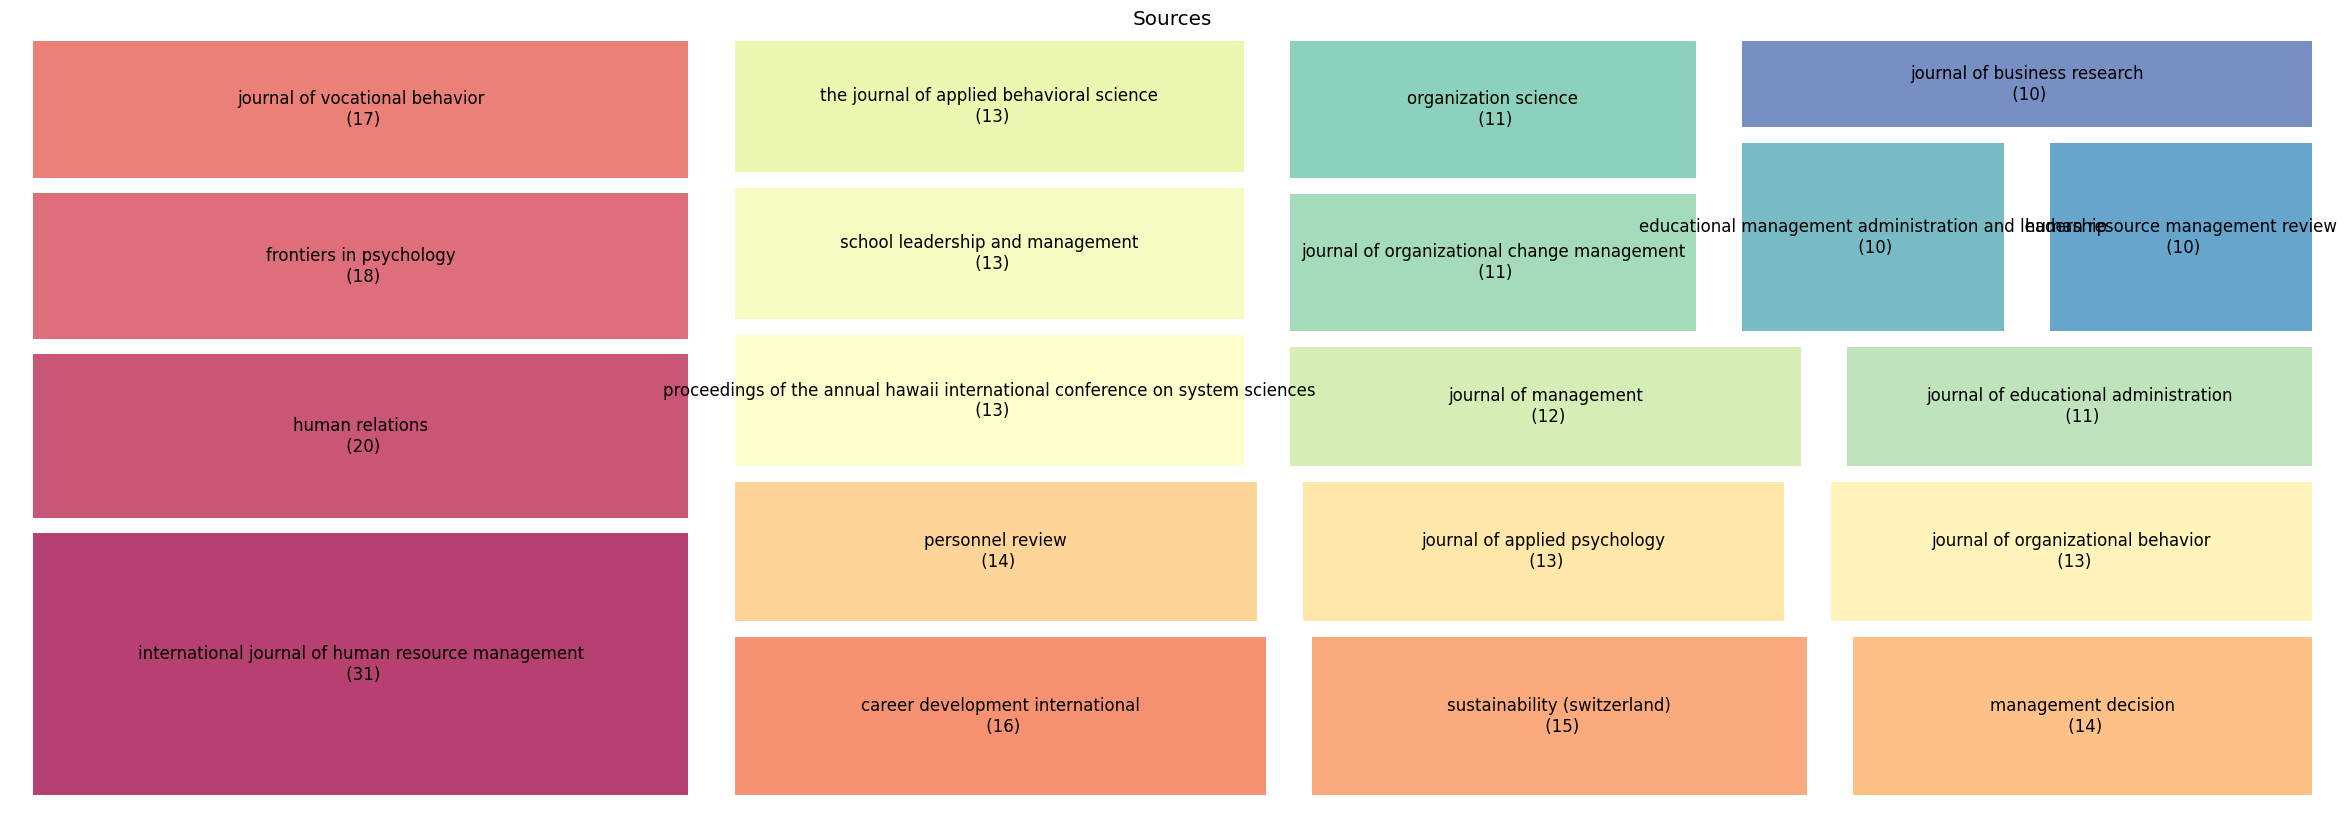

In [18]:
# Tree Map
# Arguments: entry         = 'kwp', 'kwa', 'aut', 'jou', 'ctr', or 'inst';
#            topn          = Total number entities
#            txt_font_size = Font size of the text inside the bins;
bibfile.tree_map(entry = 'jou', topn = 20, size_x = 30, size_y = 10, txt_font_size = 12)

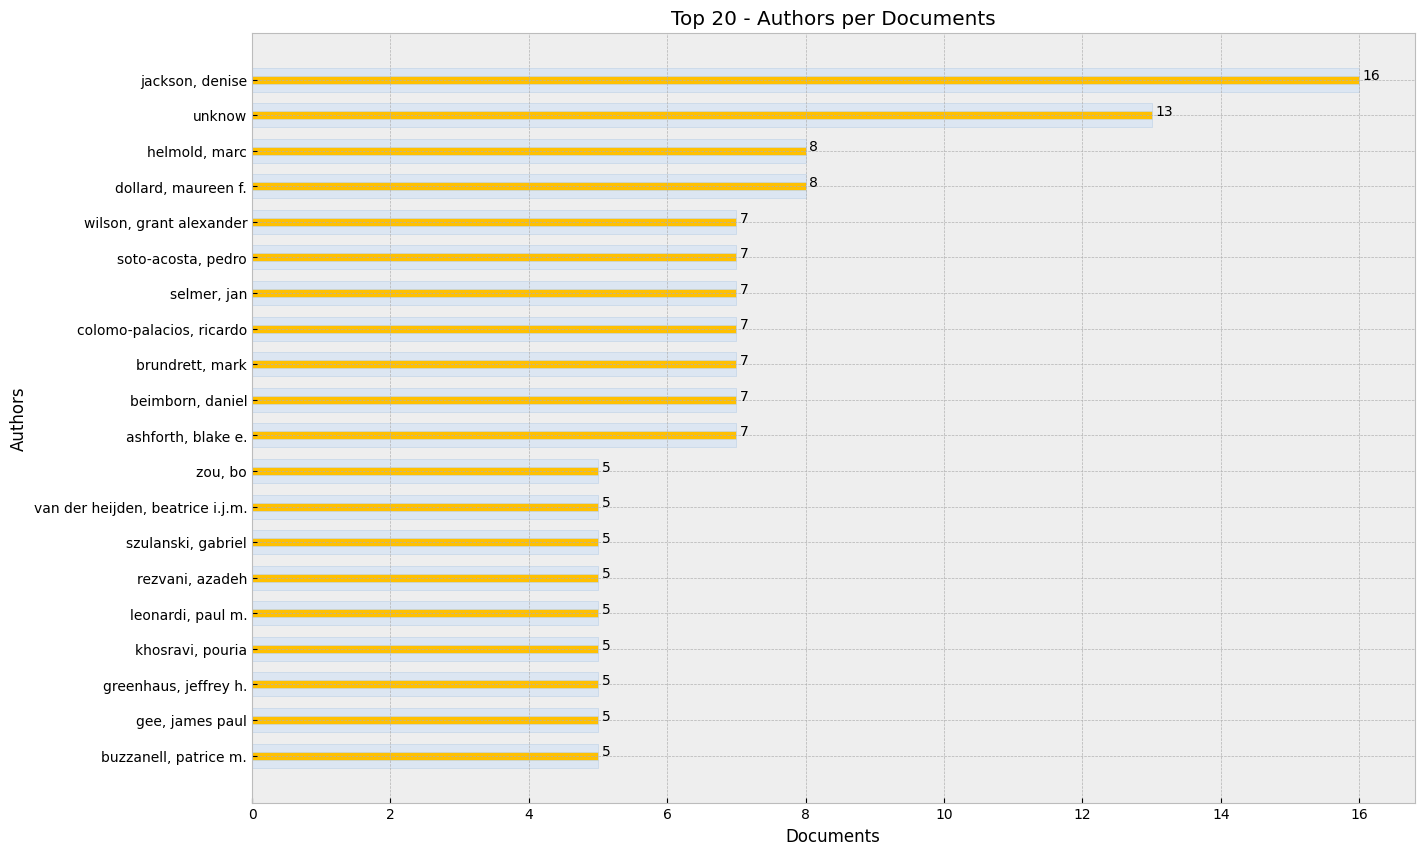

In [19]:
# Bar Plots
# Arguments: statistic = 'dpy', 'cpy', 'ppy', 'ltk', 'spd', 'spc', 'apd', 'apc', 'aph', 'bdf_1', 'bdf_2', 'bdf_3', 'ipd', 'ipc', 'cpd', 'cpc', 'lpd', 'kpd', 'kad'
#                        'dpy' = Documents per Year
#                         cpy' = Citations per Year
#                        'ppy' = Past Citations per Year
#                        'ltk' = Lotka's Law
#                        'spd' = Sources per Documents
#                        'spc' = Sources per Citations
#                        'apd' = Authors per Documents
#                        'apc' = Authors per Citations
#                        'aph' = Authors per H-Index
#                        'bdf_1', 'bdf_2', 'bdf_3' = Bradford's Law - Core Sources 1, 2 or 3
#                        'ipd' = Institutions per Documents
#                        'ipc' = Institutions per Citations
#                        'cpd' = Countries per Documents
#                        'cpc' = Countries per Citations
#                        'lpd' = Language per Documents
#                        'kpd' = Keywords Plus per Documents
#                        'kad' = Authors' Keywords per Documents
#            topn      = Total number entities
bibfile.plot_bars(statistic = 'apd', topn = 20, size_x = 15, size_y = 10)

In [ ]:
# Network - Citation Analisys Between Documents (Blue Nodes) and Citations (Red Nodes).  (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            min_count   = Relationship between nodes that have been cited at least x times;
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            local_nodes = True or False (True -> Only the blue will be displayed, False -> Red and Blue nodes will be displayed)
bibfile.network_adj_dir(view = 'notebook', min_count = 0, node_labels = True, local_nodes = False)

# Note; in the export there is no detailed information about the citations

In [25]:
# Network - Local Documents (Only Blue Nodes) Citation History. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            back        = A list of documents. It shows the documents cited by them direct and indirectly;
#            forward     = A list of documents. It shows the documents that cites them direct and indirectly
bibfile.network_hist(view = 'notebook', min_count = 0, node_size = -1, node_labels = True, back = [], forward = [])

In [26]:
# Network - Collaboration Analysis Between Authors, Countries, Intitutions Or Adjacency Analysis Between Authors' Keywords or Keywords Plus. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            adj_type    = 'aut', 'cout', 'inst', 'kwa', or 'kwp'
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            label_type  = 'id', 'name' (Only meaningfull if node_labels = True. 'id' -> The ID will be displayed; 'name' -> The name will be displayed);
#            centrality  = 'degree', 'load', 'betw', 'close', 'eigen', 'katz', 'harmonic', or None. Color nodes according to centrality criterion
#                          'degree'   = Degree Centrality
#                          'load'     = Load Centrality
#                          'betw'     = Betweenness Centrality
#                          'close'    = Closeness Centrality
#                          'eigen'    = Eigenvector Centrality
#                          'katz'     = Katz Centrality
#                          'harmonic' = Harmonic Centrality
#                           None      = The Community Algorithm, Girvan-Newman, will be used Instead of a Centrality Criterion
bibfile.network_adj(view = 'notebook', adj_type = 'aut', min_count = 5, node_labels = True, label_type = 'name', centrality = None)

# PS: If a centrality criterion is used then the values can be obtained by the following command:  bibfile.table_centr

In [30]:
# Network - Similarity Analysis using coupling or cocitation methods. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            sim_type    = 'coup', 'cocit' ('coup' -> Coupling Method, 'cocit' -> Cocitation Method)
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            cut_coup    = Cutoff value for Coupling Method. Only meaninfull if sim_type = 'coup';
#            cut_cocit   = Cutoff value for Cocitation Method. Only meaninfull if sim_type = 'cocit'
bibfile.network_sim(view = 'notebook', sim_type = 'cocit', node_size = -1, node_labels = True, cut_coup = 0.3, cut_cocit = 5)

In [31]:
# Network - Collaboration Analysis Between Countries using a Map. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            connections = True or False (True -> Countries connections will be displayed, False -> Countries connections will not be displayed);
#            country_lst = Highlight the Connections Between a List of Countries
bibfile.network_adj_map(view = 'notebook', connections = True, country_lst = [])

In [32]:
# NLP
# Arguments: corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
bibfile.create_embeddings(stop_words = ['en'], rmv_custom_words = [], corpus_type = 'abs')
emb = bibfile.embds

In [33]:
# NLP #-1 refers to all outliers and should typically be ignored.
# Arguments: stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                              'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                              'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                              'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainianian;   'es' =  Spanish;  'sv' = Swedish
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            embeddings        = True or False. If True then word embeddings are used to create the topics
bibfile.topics_creation(stop_words = ['en'], rmv_custom_words = [], embeddings = False)

    Topic  Count                                               Name  \
0      -1   1466              -1_work_study_research_organizational   
1       0    217                                        0_unknow___   
2       1    151             1_school_leadership_principals_schools   
3       2    139                   2_economic_political_rights_book   
4       3    124                  3_knowledge_sharing_km_management   
5       4    103        4_trust_relationship_justice_organisational   
6       5     87          5_learning_organizational_organization_ol   
7       6     83              6_students_learning_education_writing   
8       7     82                7_truth_language_philosophy_realism   
9       8     81                        8_music_musical_artists_art   
10      9     63                 9_literacy_education_language_book   
11     10     57     10_expatriate_diversity_adjustment_expatriates   
12     11     51                  11_care_health_healthcare_patient   
13    

In [34]:
# NLP
# Each document Topic
topics = bibfile.topics

In [35]:
# NLP
# Each document Probability to belong a Topic
probs = bibfile.probs

In [36]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_distribution(view = 'notebook')

In [37]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics(view = 'notebook')

In [38]:
# NLP
bibfile.topics_representatives()

Topic              Docs
0    -1.0                  
1     0.0        13; 13; 13
2     1.0   2191; 993; 2784
3     2.0  2167; 1696; 2869
4     3.0  2162; 1802; 2508
5     4.0  2456; 1648; 2629
6     5.0  2363; 2402; 3520
7     6.0   2049; 3246; 399
8     7.0  2115; 1998; 1734
9     8.0    2112; 18; 1054
10    9.0  1415; 2041; 1880
11   10.0  1071; 3182; 1914
12   11.0  2836; 1708; 2022
13   12.0   500; 1470; 1320
14   13.0    1695; 324; 451
15   14.0   1253; 381; 3248
16   15.0  3340; 2770; 1588
17   16.0  2640; 2500; 2481
18   17.0    1549; 10; 2052
19   18.0    2335; 615; 799
20   19.0     1197; 503; 45
21   20.0     278; 648; 485
22   21.0  2597; 1881; 3625
23   22.0     68; 2297; 750
24   23.0  1675; 1806; 1724
25   24.0     167; 870; 547
26   25.0   563; 1756; 2639
27   26.0  3393; 1781; 2102
28   27.0   1104; 775; 1122
29   28.0     858; 963; 628
30   29.0  3195; 2669; 2861
31   30.0  3604; 3570; 3499
32   31.0  1064; 2874; 1041
33   32.0  2320; 2957; 1019
34   33.0   650; 1553; 1459
35   34.0      334; 89; 321
36   35.0   2205; 2445; 589
37   36.0  2281; 1627; 1243
38   37.0   2343; 910; 2126
39   38.0     39; 1273; 319
40   39.0    1302; 79; 2791
41   40.0  2894; 3388; 1411
42   41.0   1640; 627; 1098
43   42.0  3597; 2448; 3590
44   43.0  2075; 3640; 2779
45   44.0  3032; 2487; 1455
46   45.0  2249; 1892; 3240
47   46.0   2862; 1993; 185
48   47.0  1469; 2170; 3552
49   48.0  2730; 1596; 3547
50   49.0      787; 104; 70
51   50.0   1330; 2491; 555
52   51.0  2685; 2744; 3621
53   52.0   1262; 1977; 290
54   53.0  1738; 1140; 3682
55   54.0      73; 130; 430
56   55.0   1647; 1759; 531
57   56.0   603; 1422; 2761

In [39]:
# NLP
similar_topics, similarity = bibfile.topic_model.find_topics('electre', top_n = 10)
for i in range(0, len(similar_topics)):
  print('Topic: ', similar_topics[i], 'Correlation: ', round(similarity[i], 3))

Topic:  0 Correlation:  0.203
Topic:  8 Correlation:  0.151
Topic:  21 Correlation:  0.125
Topic:  48 Correlation:  0.119
Topic:  7 Correlation:  0.112
Topic:  2 Correlation:  0.11
Topic:  35 Correlation:  0.1
Topic:  47 Correlation:  0.092
Topic:  13 Correlation:  0.084
Topic:  18 Correlation:  0.083
